<a href="https://colab.research.google.com/github/wadidBMJ1997/neural-network/blob/main/IA_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrenando el modelo...
Epoch 1/500
7/7 [==============================] - 1s 39ms/step - loss: 19.9696 - accuracy: 0.0183 - val_loss: 14.6004 - val_accuracy: 0.2283
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 12.1152 - accuracy: 0.2877 - val_loss: 8.0173 - val_accuracy: 0.3014
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 5.0092 - accuracy: 0.3425 - val_loss: 4.1006 - val_accuracy: 0.6986
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 3.9779 - accuracy: 0.6986 - val_loss: 3.1217 - val_accuracy: 0.6986
Epoch 5/500
7/7 [==============================] - 0s 12ms/step - loss: 2.9481 - accuracy: 0.6575 - val_loss: 2.7880 - val_accuracy: 0.4658
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 2.6178 - accuracy: 0.5571 - val_loss: 2.2380 - val_accuracy: 0.6986
Epoch 7/500
7/7 [==============================] - 0s 10ms/step - loss: 2.2437 - accuracy: 0.6986 - val_loss: 2.0525 - val_accuracy: 

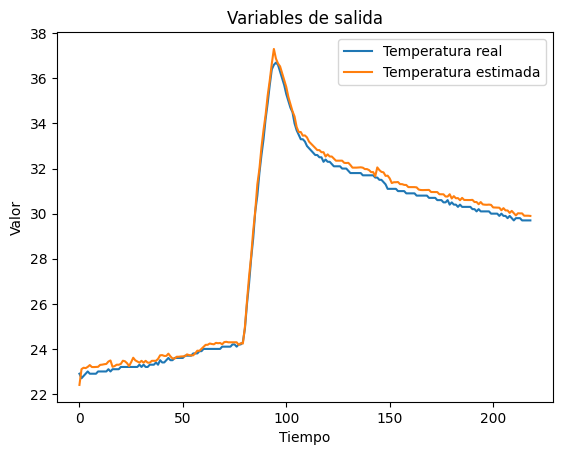

ha finalizado mirar las graficas en el siguiente codigo 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam

def funcion_retardada(areglo, num_retardo):
    areglo_array = np.zeros_like(areglo)
    areglo_array[num_retardo:] = areglo[:-num_retardo]
    return areglo_array

# lee el  Excel archivo desde a Pandas DataFrame
df = pd.read_excel('15-06-22.xlsx')

# contenido  DataFrame
pd.set_option('display.width', 220)
#print(df.head())

#primer_registro = df.values
#print(primer_registro)
# variable de entradas
v1 = []
v2 = []
v3 = []
v4 = []
# variables de salidas
v5 = []
v6 = []
v7 = []

# recorrido de los datos de entradas y de salidas por excel
for i, fila in df.iterrows():
    v1.append(fila.values[8])
    v2.append(fila.values[13])
    v3.append(fila.values[14])
    v4.append(fila.values[15])
    v5.append(fila.values[2])
    v6.append(fila.values[5])
    v7.append(fila.values[7])

# Datos de entrada
flujo_de_aire = np.array(v1, dtype=float)
ducha = np.array(v2, dtype=float)
secuestrante = np.array(v3, dtype=float)
valvula_manual = np.array(v4, dtype=float)
entrada = np.column_stack((flujo_de_aire, secuestrante, ducha, valvula_manual))

# Datos de salida
temperatura_tanque = np.array(v5, dtype=float)
nivel_tanque = np.array(v6, dtype=float)
OD = np.array(v7, dtype=float)
salida = np.column_stack((temperatura_tanque, nivel_tanque, OD))

# Crear versiones retardadas de las matrices de entrada y salida
entrada = np.column_stack((
    funcion_retardada(flujo_de_aire, 2),
    funcion_retardada(secuestrante, 2),
    funcion_retardada(ducha, 2),
    funcion_retardada(valvula_manual, 2),
    funcion_retardada(temperatura_tanque, 1),
    funcion_retardada(nivel_tanque, 1),
    funcion_retardada(OD, 1)
))


# Definir la arquitectura del modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=220, activation='relu', input_shape=[7]),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(3, activation='linear')
])

# Compilar el modelo con el optimizador personalizado
opt = Adam(learning_rate=0.001)
modelo.compile(optimizer=opt, loss='mean_absolute_error', metrics=['accuracy'])

# Entrenar el modelo
print("Entrenando el modelo...")
historial = modelo.fit(
    x=entrada,
    y=salida,
    epochs=500,
    validation_data=(entrada, salida),
    #verbose=0
)

print("Entrenamiento finalizado.")

# Guardar el modelo
modelo.save('IdentificacionRNA')

# Cargar el modelo guardado
modelo_regular = tf.keras.models.load_model('IdentificacionRNA')


# Realizar predicciones
prediccion = modelo.predict(entrada)

# Graficar la variable temperatura del tanque
plt.plot(temperatura_tanque, label='Temperatura real')
plt.plot(prediccion[:, 0], label='Temperatura estimada')

plt.title('Variables de salida')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



print("ha finalizado mirar las graficas en el siguiente codigo ")

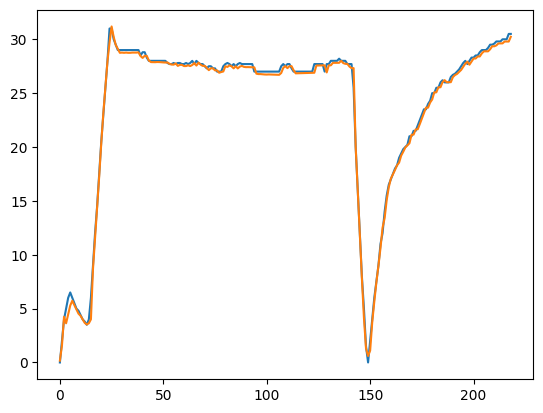

In [ ]:
# Graficar la variable nivel_tanque
plt.plot(nivel_tanque, label='nivel_tanque real')
plt.plot(prediccion[:, 1], label='nivel_tanque estimada')

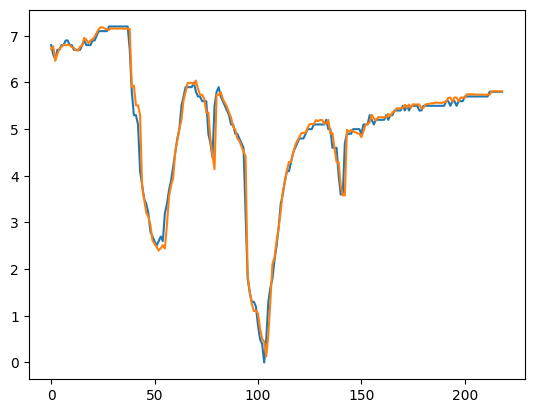

In [ ]:

# Graficar la variable OD
plt.plot(OD, label='OD real')
plt.plot(prediccion[:, 2], label='OD estimada')

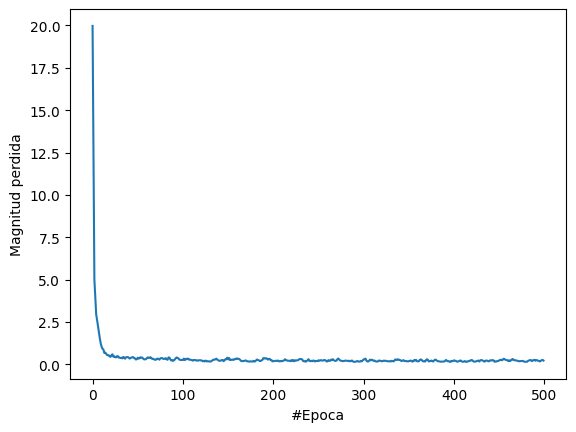

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('#Epoca')
plt.ylabel("Magnitud perdida")
plt.plot(historial.history["loss"])